## Logistic Regresion - Cost Function

No podemos usar la misma función de costo que usamos para la regresión lineal porque la función logística hará que la salida sea ondulada, causando muchos óptimos locales. En otras palabras, no será una función convexa.

En cambio, nuestra función de costo para la regresión logística se ve así:
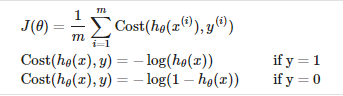

In [1]:
import numpy as np
import pandas as pd

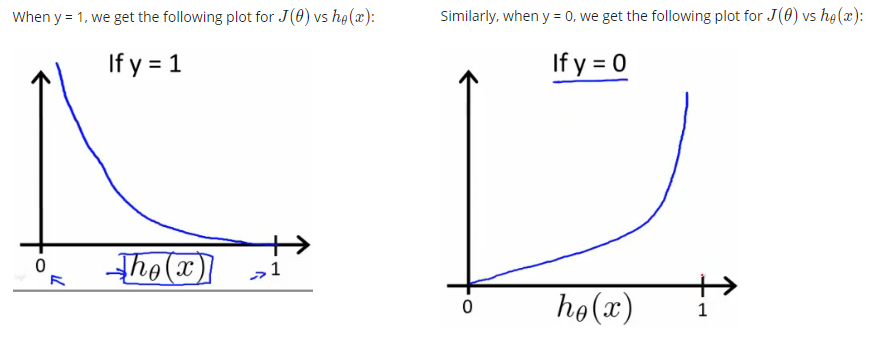

Si nuestra respuesta correcta 'y' es 0, entonces la función de costo será 0 si nuestra función de hipótesis también genera 0. Si nuestra hipótesis se aproxima a 1, entonces la función de costo se acercará al infinito.

Si nuestra respuesta correcta 'y' es 1, entonces la función de costo será 0 si nuestra función de hipótesis genera 1. Si nuestra hipótesis se aproxima a 0, entonces la función de costo se acercará al infinito.

Tenga en cuenta que escribir la función de costo de esta manera garantiza que J (θ) sea convexo para la regresión logística.

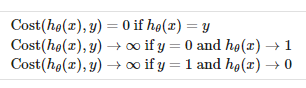

## Simplified Cost Function and Gradient Descent

Podemos comprimir los dos casos condicionales de nuestra función de costos en un solo caso:
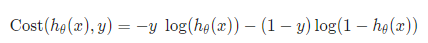

Podemos escribir completamente nuestra función de costos completa de la siguiente manera:
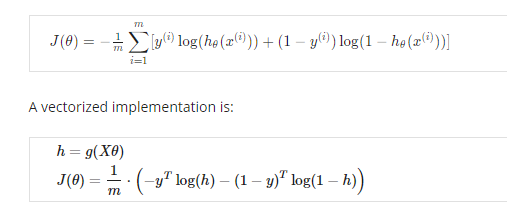

**Descenso de gradiente**
Recuerde que la forma general de descenso de gradiente es:
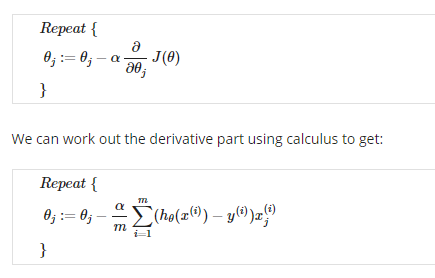

Observe que este algoritmo es idéntico al que usamos en la regresión lineal. Todavía tenemos que actualizar simultáneamente todos los valores en theta.
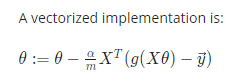

## Advanced Optimization

Existen otros algoritmos de optimización:
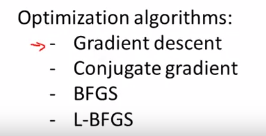

Bentajas:
- No necesitas seleccionar el parámetro alpha de aprenizaje
- Convergen más rápido que el descenso de gradiente

"Gradiente conjugado", "BFGS" y "L-BFGS" son formas más sofisticadas y rápidas de optimizar θ que se pueden usar en lugar del descenso de gradiente. Sugerimos que no escriba estos algoritmos más sofisticados usted mismo (a menos que sea un experto en informática numérica), sino que utilice las bibliotecas, ya que ya están probadas y altamente optimizadas. Octave los proporciona.

Primero necesitamos proporcionar una función que evalúe las siguientes dos funciones para un valor de entrada dado θ:

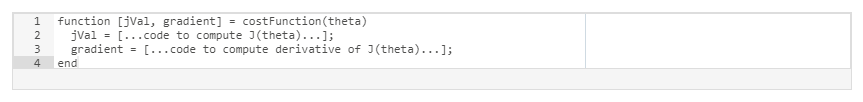

Entonces podemos usar el algoritmo de optimización "fminunc ()" de octava junto con la función "optimset ()" que crea un objeto que contiene las opciones que queremos enviar a "fminunc ()". (Nota: el valor para MaxIter debe ser un entero, no una cadena de caracteres
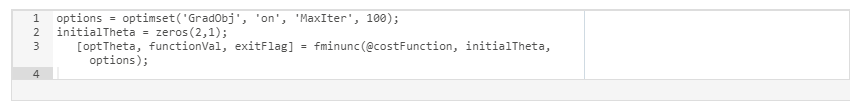
Le damos a la función "fminunc ()" nuestra función de costo, nuestro vector inicial de valores theta y el objeto "opciones" que creamos de antemano.

**Ejemplo:**
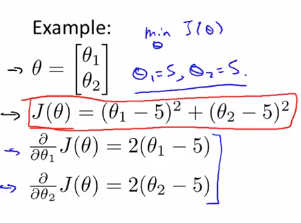

In [5]:
theta1 = 8
theta2 = 6

theta = np.array([[theta1],[theta2]])
theta

array([[8],
       [6]])

In [7]:
# Creando la funcion de costos
j_val = (theta1-5)^2 + (theta2-5)^2 
j_val

2

In [17]:
# Creando la gradiente descendente
gradient = np.zeros((2,1))

gradient[0] = 2*(theta1-5)
gradient[1] = 2*(theta2-5)
gradient

array([[6.],
       [2.]])

## The Problem of Overfitting (Regularizacion)

Considere el problema de predecir y a partir de x ∈ R. La siguiente figura más a la izquierda muestra el resultado de ajustar 
Y = θ_0 + θ_1X a un conjunto de datos. Vemos que los datos realmente no se encuentran en línea recta, por lo que el ajuste no es muy bueno.
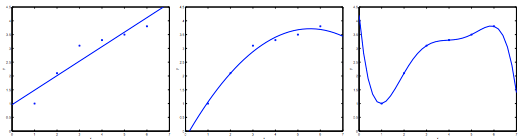
En cambio, si hubiéramos agregado una función adicional (funcion cuadrática)entonces obtenemos un ajuste ligeramente mejor a los datos (ver figura del medio). Ingenuamente, podría parecer que cuantas más funciones agreguemos, mejor. Sin embargo, también existe el peligro de agregar demasiadas características: la cifra más a la derecha es el resultado de ajustar el orden polinomico

La falta de ajuste, o alto sesgo, es cuando la forma de nuestra función de hipótesis h se correlaciona mal con la tendencia de los datos. Generalmente es causado por una función que es demasiado simple o usa muy pocas características. En el otro extremo, el sobreajuste o la alta varianza son causados por una función de hipótesis que se ajusta a los datos disponibles pero que no se generaliza bien para predecir nuevos datos. Generalmente es causado por una función complicada que crea muchas curvas y ángulos innecesarios no relacionados con los datos.

Esta terminología se aplica a la regresión lineal y logística. Hay dos opciones principales para abordar el problema del sobreajuste:

**1) Reduce la cantidad de funciones:**
Seleccione manualmente qué características mantener.
Use un algoritmo de selección de modelo (estudiado más adelante en el curso).

**2) Regularización**
Mantenga todas las funciones, pero reduzca la magnitud de los parámetros. Theta_jθ La regularización funciona bien cuando tenemos muchas funciones ligeramente útiles.

### Cost Function

Si tenemos un sobreajuste de nuestra función de hipótesis, podemos reducir el peso que tienen algunos de los términos en nuestra función aumentando su costo.

Digamos que queremos hacer que la siguiente función sea más cuadrática:
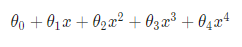

Queremos eliminar la influencia de θ_3x ^ 3 y θ_4x ^ 4. Sin deshacernos de estas características o cambiar la forma de nuestra hipótesis, podemos modificar nuestra función de costos:

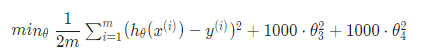
Hemos agregado dos términos adicionales al final para inflar el costo de θ _3 y θ _4. Ahora, para que la función de costo se acerque a cero, tendremos que reducir los valores de θ _3θ y θ _4θ a cerca de cero. Esto a su vez reducirá en gran medida los valores de θ _3x ^ 3 y θ _4x ^ 4 en nuestra función de hipótesis. Como resultado, vemos que la nueva hipótesis (representada por la curva rosa) parece una función cuadrática pero se ajusta mejor a los datos debido a los términos extra pequeños small _3x ^ 3θ y θ _4x ^ 4

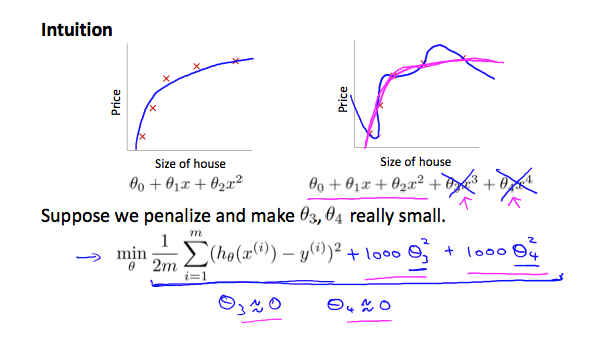
También podríamos regularizar todos nuestros parámetros theta en una sola suma como:

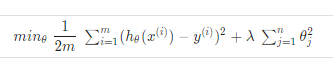
El λ, o lambda, es el parámetro de regularización. Determina cuánto se inflan los costos de nuestros parámetros theta.

Usando la función de costo anterior con la suma adicional, podemos suavizar el resultado de nuestra función de hipótesis para reducir el sobreajuste. Si se elige que lambda sea demasiado grande, puede suavizar demasiado la función y causar un ajuste insuficiente. Por lo tanto, ¿qué pasaría si \ lambda = 0λ = 0 o es demasiado pequeño?

Podemos aplicar la regularización tanto a la regresión lineal como a la regresión logística. Nos acercaremos primero a la regresión lineal.
- Gradient Descent
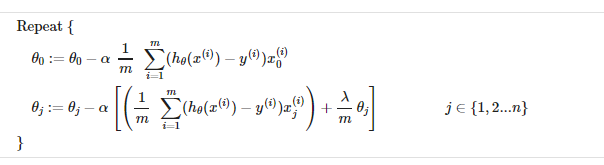

Con alguna manipulación, nuestra regla de actualización también se puede representar como
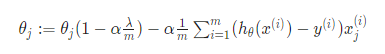

**Ecuación normal**

Ahora acerquémonos a la regularización utilizando el método alternativo de la ecuación normal no iterativa.

Para agregar en la regularización, la ecuación es la misma que la original, excepto que agregamos otro término dentro de los paréntesis:

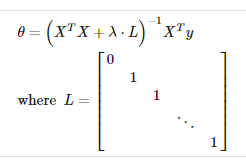
L es una matriz con 0 en la parte superior izquierda y 1 en la diagonal, con 0 en todas partes. Debe tener dimensión (n + 1) × (n + 1). Intuitivamente, esta es la matriz de identidad

**Regresión logística regularizada**

Podemos regularizar la regresión logística de una manera similar a la que regularizamos la regresión lineal. Como resultado, podemos evitar el sobreajuste. La siguiente imagen muestra cómo es menos probable que la función regularizada, mostrada por la línea rosada, se sobreajuste que la función no regularizada representada por la línea azul:
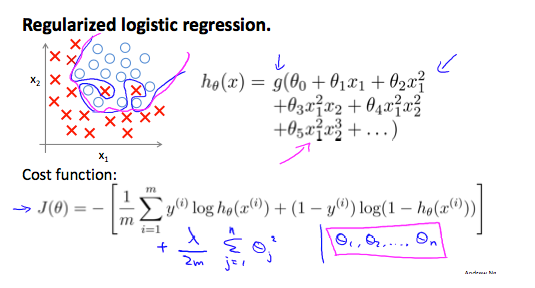

Función de costo
Recuerde que nuestra función de costo para la regresión logística fue:
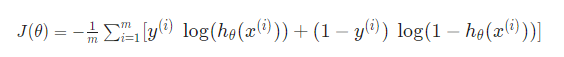

Podemos regularizar esta ecuación agregando un término al final:
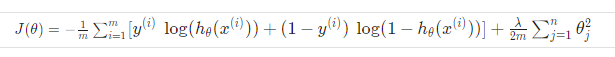
al calcular la ecuación, debemos actualizar continuamente las dos ecuaciones siguientes:

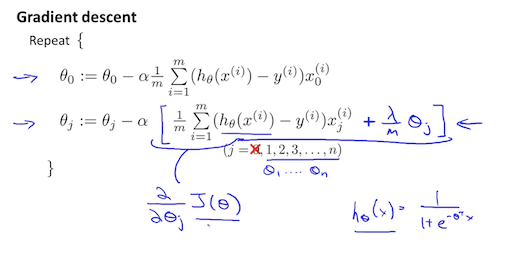